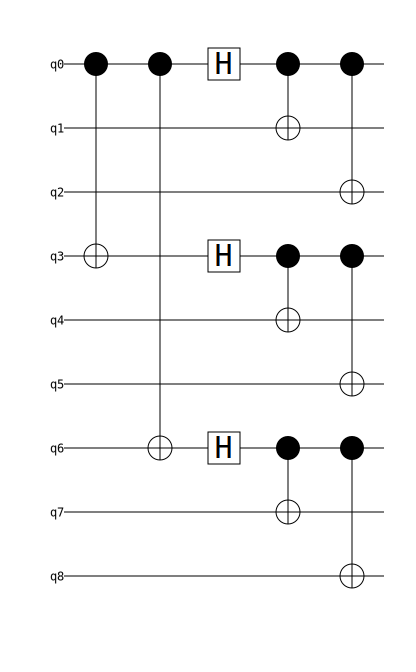

In [ ]:
import stim
import numpy as np
from IPython.display import SVG, display, Math
import matplotlib.pyplot as plt
from typing import Counter
import sys, os; sys.path.append(os.path.abspath(".."))

# --- Parameters ---
chance = 0.3

# --- Build circuit (|0_L> for the 9-qubit Shor code) ---
circuit = stim.Circuit()
circuit.append("CNOT", [0, 3])
circuit.append("CNOT", [0, 6])
circuit.append("H", [0, 3, 6])
circuit.append("CNOT", [0, 1])
circuit.append("CNOT", [3, 4])
circuit.append("CNOT", [6, 7])
circuit.append("CNOT", [0, 2])
circuit.append("CNOT", [3, 5])
circuit.append("CNOT", [6, 8])

# Show circuit diagram as SVG
SVG(str(circuit.diagram("timeline")))